## XG Boost Analysis of 3 Datasets

# Cancer Dataset

In [3]:
#Wisconsin Breast Cancer dataset
import matplotlib.pyplot as plt
import io
import pandas as pd
from sklearn.preprocessing import StandardScaler

cancer = pd.read_csv(r"C:\Users\eklas\OneDrive\Desktop\CSV\AI_ML\wisconsin_breast.csv")
                 #header=None, encoding='utf-8')
pd.set_option('display.max_rows', 5)

#can dro the 'id' col
cancer.drop(['id'], inplace = True, axis = 1)

# reanme some cols
cancer=cancer.rename(columns={'concave points_mean':'concave_points_mean', 
                                'concave points_worst':'concave_points_worst', 'concave points_se':'concave_points_se'})

# Assign X and y
X = cancer.drop('diagnosis', axis = 1)
y = cancer['diagnosis']


cancer.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [71]:
cancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.00000,569.000000,569.000000,569.000000,569.000000,...,569.00000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.09636,0.104341,0.088799,0.048919,0.181162,...,16.26919,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.10530,0.130400,0.130700,0.074000,0.195700,...,18.79000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.16340,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [2]:
# find nulls

nulls = cancer.isnull().sum()
nulls = nulls.sum()
# no nulls, 31 cols, great
print('\nThere are', cancer.shape[0],'rows in the dataset')
print('There are', cancer.shape[1],'columns (features) in the dataset')
print('There are {}'.format(nulls),'nulls in the dataset')


There are 569 rows in the dataset
There are 31 columns (features) in the dataset
There are 0 nulls in the dataset


In [3]:
# Percentage of cancer and no breast cancer participants
dataset = cancer
count_no_cancer = len(dataset[dataset['diagnosis']==0])
count_cancer = len(dataset[dataset['diagnosis']==1])
pct_no_cancer = count_no_cancer/(count_no_cancer+count_cancer)*100
pct_of_cancer = count_cancer/(count_no_cancer+count_cancer)*100
print("Composition of the Dataset's Classes: \n")
print("Breast Cancer Diagnosis: {:.1f}".format(pct_of_cancer), '%')
print("No Breast Cancer: {:.1f}".format(pct_no_cancer), '%')

Composition of the Dataset's Classes: 

Breast Cancer Diagnosis: 37.3 %
No Breast Cancer: 62.7 %


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

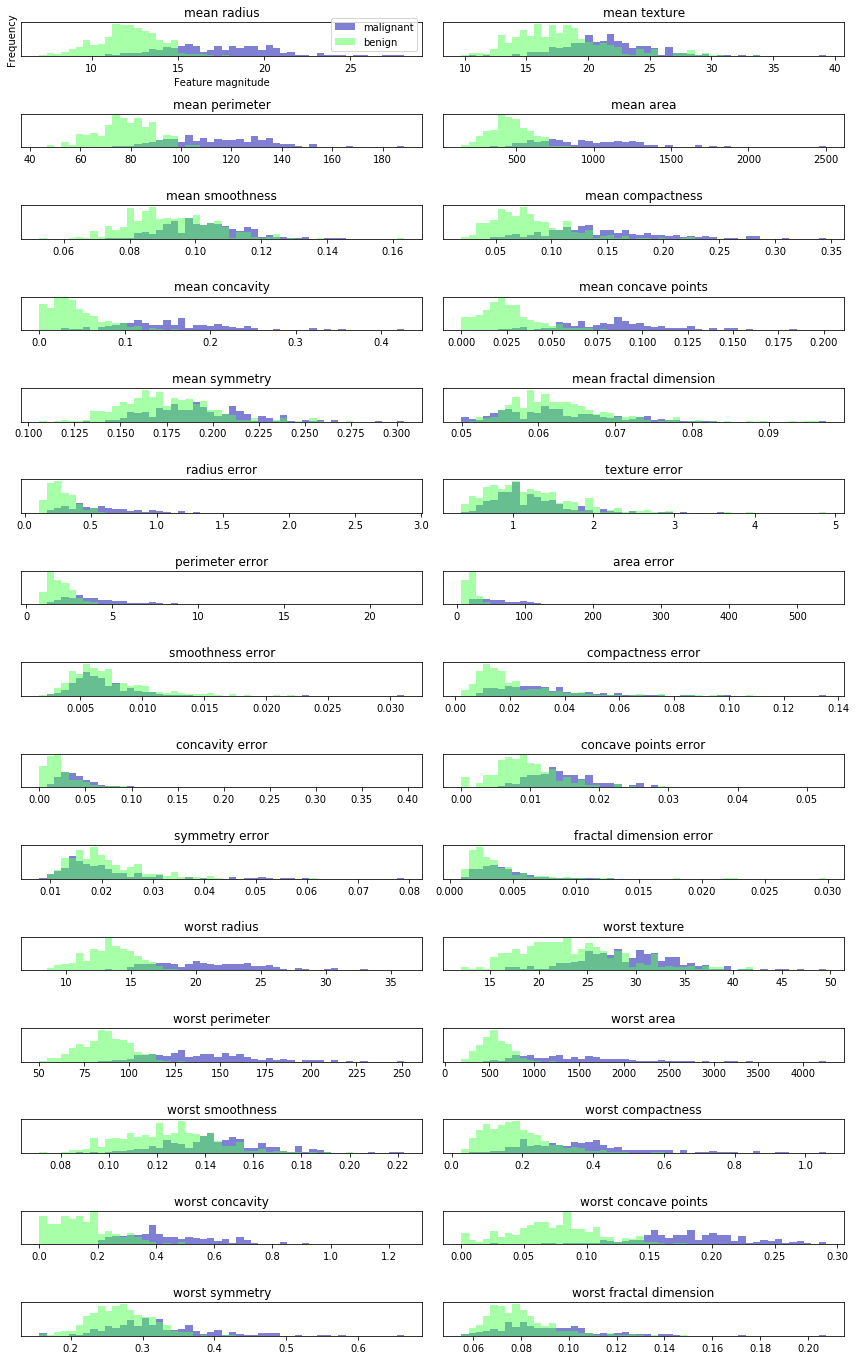

In [2]:
#  Per-class feature histograms on the Breast Cancer dataset
import matplotlib.pyplot as plt
import mglearn
import numpy as np

from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(12, 19))
malignant = cancer.data[cancer.target == 0] 
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(()) 
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["malignant", "benign"],
                 loc="best")
    fig.tight_layout()
    
# from here we can see that there is a lot of overlap of the 2 distributions between, say, texture error. 
# so we're not going to get much new information there. However, looking at say, worst concave points,
# there's a lot of variation in the 2 populations, so we'll get a lot of information from that featuer.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# scale 
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# PCA Analysis: Principal Components Analysis
PCA identifies the hyperplane that lies closest to the data, and then projects the data onto it.

In [6]:
from sklearn.decomposition import PCA # keep the first two principal components of the data 

pca = PCA(n_components=2) # fit PCA model to breast cancer data 
pca.fit(X_scaled)# transform data onto the first two principal components 

X_pca = pca.transform(X_scaled) 
print("Original shape of Breast Cancer dataset: {}".format(str(X_scaled.shape))) 
print("Reduced shape of Breast Cancer dataset: {}".format(str(X_pca.shape)))

# reduced training dataset down to 2 features

Original shape of Breast Cancer dataset: (569, 30)
Reduced shape of Breast Cancer dataset: (569, 2)


In [10]:
import numpy as np

pca	= PCA() 
pca.fit(X) 
cumsum = np.cumsum(pca.explained_variance_ratio_) 
d = np.argmax(cumsum >= 0.95) + 1 
d
# compute PCA without reducing dimensionality, then computes minumum number of dimensions required
# to preserve 95% of the training set's variance
# 1 feature accounts for greater than or equal to 95% of the training dataset's variabiltiy

1

Text(0.5, 1.0, '\nExplained Variance by # of Dimensions using PCA\n')

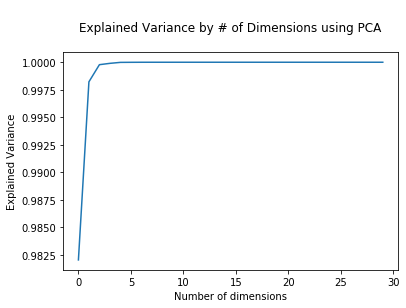

In [9]:
# Explained variance

# scale it

from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

plt.plot(cumsum)
plt.xlabel("Number of dimensions")
plt.ylabel("Explained Variance")
plt.title("\nExplained Variance by # of Dimensions using PCA\n")
# pretty much all of the variability is explained after 2 dimensions

Text(0, 0.5, 'Second principal component')

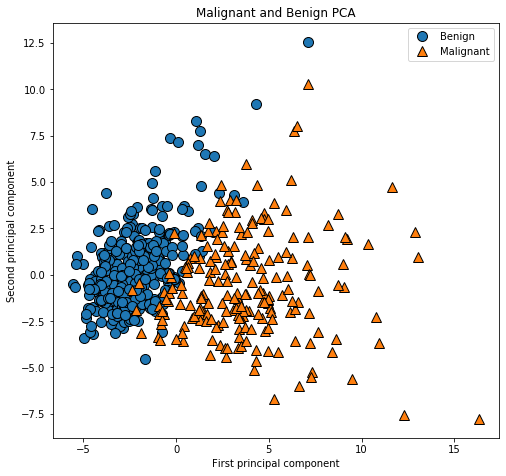

In [225]:
import numpy as np

import mglearn

# plot the 2 principal components

# plot first vs. second principal component, colored by class 
plt.figure(figsize=(8, 8)) 
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y) 
plt.legend(["Benign", "Malignant"],
           loc="best") 
plt.gca().set_aspect("equal") 
plt.title("Malignant and Benign PCA")
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")

# can see that there's a bigger spread in the malignant, 1; more variation. Benign, 0, is more clustered.

In [224]:
print("PCA component shape: {}".format(pca.components_.shape)) 

PCA component shape: (2, 30)


Original shape of dataset: (569, 30)
Reduced shape of dataset: (569, 2)


Text(0, 0.5, 'Principal components')

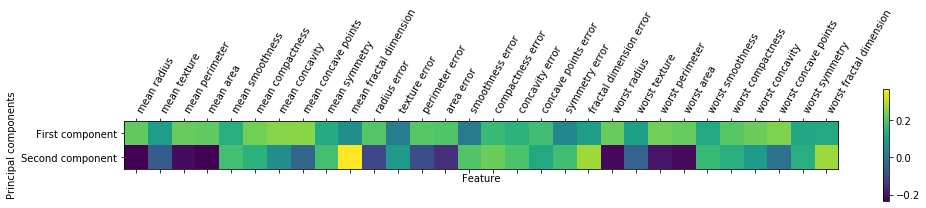

In [10]:
# heatmap coefficients for first and second component

from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

pca = PCA(n_components=2) # fit PCA model to breast cancer data 
pca.fit(X_scaled)# transform data onto the first two principal components 

X_pca = pca.transform(X_scaled) 
print("Original shape of dataset: {}".format(str(X_scaled.shape))) 
print("Reduced shape of dataset: {}".format(str(X_pca.shape)))

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar() 
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left') 
plt.xlabel("Feature") 
plt.ylabel("Principal components")

# XG Boost Classifier

XGBoost, or Extreme Gradient Boost, is a decision-tree-based ensemble algorithm using gradient boosted decision trees designed for speed and performance. The name refers to the engineering goal to push the limit of computations resources for boosted tree algorithms, by taking a bunch of weak learners (trees) are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. XGBoost makes splits up to the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.

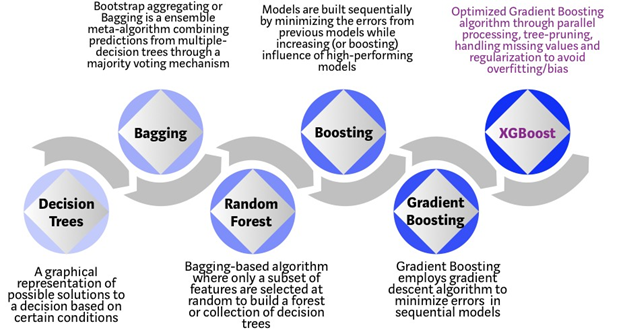

In [11]:
import xgboost as xgb
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Start time:  2020-02-27 11:03:46.976677
Building model..  0:00:00.011003
/nXGBoost params: eta: 0.1, max_depth: 6, subsample: 1, colsample_by_tree: 1
Length train: 409
Length valid: 46
[0]	train-auc:0.99365	eval-auc:0.929112
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 20 rounds.
[1]	train-auc:0.99365	eval-auc:0.929112
[2]	train-auc:0.995444	eval-auc:0.966919
[3]	train-auc:0.995792	eval-auc:0.968809
[4]	train-auc:0.999097	eval-auc:0.965028
[5]	train-auc:0.999097	eval-auc:0.965028
[6]	train-auc:0.999303	eval-auc:0.963138
[7]	train-auc:0.999613	eval-auc:0.959357
[8]	train-auc:0.999716	eval-auc:0.964083
[9]	train-auc:0.999793	eval-auc:0.979206
[10]	train-auc:0.999819	eval-auc:0.977316
[11]	train-auc:0.999845	eval-auc:0.977316
[12]	train-auc:0.999845	eval-auc:0.977316
[13]	train-auc:0.999845	eval-auc:0.977316
[14]	train-auc:0.999871	eval-auc:0.977316
[15]	train-auc:0.999871	eval-auc:0.977316
[16]	train-auc

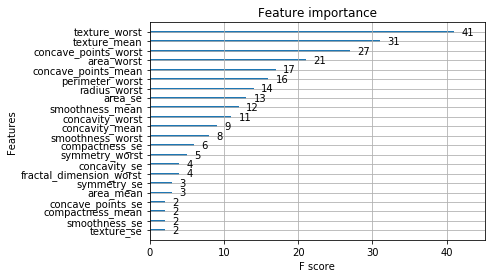

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

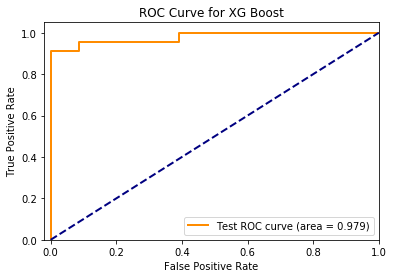

Training time: 0.02 minutes
0:00:01.474491


In [9]:
from operator import itemgetter
import random
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from numpy import genfromtxt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
import datetime as dt
import subprocess
from subprocess import check_output
from collections import defaultdict

def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
    outfile.close()

def get_importance(gbm, features):
    create_feature_map(features)
    importance = gbm.get_fscore(fmap='xgb.fmap')
    importance = sorted(importance.items(), key=itemgetter(1), reverse=True)
    return importance

def get_features(train, test):
    trainval = list(train.columns.values)
    output = trainval
    return sorted(output)

def run_single(train, test, features, target, random_state=0):
    eta = 0.1
    max_depth= 6 
    subsample = 1
    colsample_bytree = 1
    min_chil_weight=1
    start_time = time.time()

    print('/nXGBoost params: eta: {}, max_depth: {}, subsample: {}, colsample_by_tree: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "eta": eta,
        "tree_method": 'exact',
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "min_chil_weight":min_chil_weight,
        "seed": random_state,
    }
    num_boost_round = 500
    early_stopping_rounds = 20
    test_size = 0.1
     
    X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
    print('Length train:', len(X_train.index))
    print('Length valid:', len(X_valid.index))
    y_train = X_train[target]
    y_valid = X_valid[target]
    dtrain = xgb.DMatrix(X_train[features], y_train, missing=-99)
    dvalid = xgb.DMatrix(X_valid[features], y_valid, missing =-99)

    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

    print("Validating...\n")
    check = gbm.predict(xgb.DMatrix(X_valid[features]), ntree_limit=gbm.best_iteration+1)
    
    #area under the precision-recall curve
    score = average_precision_score(X_valid[target].values, check)
    print('Area under the precision-recall curve: {:.4f}'.format(score))

    check2=check.round()
    score = precision_score(X_valid[target].values, check2)
    print('Precision score: {:.4f}'.format(score))

    score = recall_score(X_valid[target].values, check2)
    print('Recall score: {:.4f}'.format(score))
    
    imp = get_importance(gbm, features) # I will plot this
#     print('Importance array: ', imp) # I don't need to show the printed array, I'd rather plot it

    print("Prediction Test Set...")
    test_prediction = gbm.predict(xgb.DMatrix(test[features],missing = -99), ntree_limit=gbm.best_iteration+1)
    score = average_precision_score(test[target].values, test_prediction)

    print('Area under the precision-recall curve test set: {:.3f}'.format(score))
    
    ############################################ ROC Curve

    # plot the feature importance
    xgb.plot_importance(gbm) #feature importance plotted
    plt.figure()
    fig = plt.figure(figsize=(20, 20))
    plt.show()
    
    # Compute micro-average ROC curve and ROC area
    
    fpr, tpr, _ = roc_curve(X_valid[target].values, check)
    roc_auc = auc(fpr, tpr)
 
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='Test ROC curve (area = %.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for XG Boost')
    plt.legend(loc="lower right")
    plt.show()
    ##################################################

    print('Training time: {} minutes'.format(round((time.time() - start_time)/60, 2)))
    return test_prediction, imp, gbm.best_iteration+1

# Save as output
start_time = dt.datetime.now()
print("Start time: ",start_time)

data = cancer

train, test = train_test_split(data, test_size=.2, random_state=random.seed(2016))

features = list(train.columns.values)
features.remove('diagnosis')
# print(features)


print("Building model.. ",dt.datetime.now()-start_time)
preds, imp, num_boost_rounds = run_single(train, test, features, 'diagnosis',42)
 
print(dt.datetime.now()-start_time)

In [19]:
# cross-validation and error measuring
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, as_pandas=True, seed=123)

In [20]:
cv_results.head()

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.072062,0.005488,0.103722,0.015341
1,0.058869,0.005347,0.086188,0.040155
2,0.047447,0.003666,0.079161,0.042537
3,0.038673,0.007598,0.073879,0.038384
4,0.038668,0.006240,0.070370,0.040127


In [22]:
# AUC results with CV

cv_results_auc = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, metrics = 'auc', as_pandas=True, seed=123)

cv_results_auc.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.971598,0.011808,0.934010,0.037894
1,0.987526,0.003453,0.956481,0.030774
2,0.989026,0.002676,0.961975,0.025665
3,0.990798,0.005066,0.966817,0.019498
4,0.991146,0.004984,0.968812,0.020461


In [15]:
#----------Testing Best Parameters---------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time

t0 = time()
clf_xg =clf_xg.best_estimator_
y_pred_xg = clf_xg.predict(X_test)
print("done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores_cv_xg = cross_val_score(clf_xg, X_train, y_train, cv=cv)

scores = cross_val_score(clf_xg, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

done in 0.013s


In [16]:
#---------XGBoost Classification report--------

print ("----------------------> [XGBoost Performance Summary]")
xgb_accuracy = (accuracy_score(y_pred_xg, y_test)) *100
print("Accuracy: {:.2f}%".format(xgb_accuracy))
print("CV Mean: {:.3f} (std: {:.2f})".format(scores_cv_xg.mean(),
                                          scores_cv_xg.std()),
                                          end="\n\n" )
xgb_cm = confusion_matrix(y_test, y_pred_xg)
xg_misclass = (y_test != y_pred_xg).sum()
xg_error_rate = (y_test != y_pred_xg).sum()/y_pred_xg.sum()
mean_roc_auc = (scores.mean())*100
xg_train_accuracy = (clf_xg.score(X_train, y_train))*100
xg_test_accuracy = (clf_xg.score(X_test, y_test))*100

print("\nXG Boost Confusion Matrix:\n")
print(xgb_cm)
print("\nXG Boost Classification Report:\n")
print(classification_report(y_test, y_pred_xg))
print('Mean ROC AUC: {:.2f}%'.format(mean_roc_auc))
print('Misclassified examples: {:d}'.format(xg_misclass))
print('Misclassification Rate: {:.2f}%'.format(xg_error_rate))
print("Training Set Accuracy: {:.3f}".format(xg_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(xg_test_accuracy))
print('--------------- XGBoostClassifier --Parameters specified-- : classifier.fit [Done]')

----------------------> [XGBoost Performance Summary]
Accuracy: 96.49%
CV Mean: 0.952 (std: 0.03)


XG Boost Confusion Matrix:

[[72  1]
 [ 3 38]]

XG Boost Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        73
           1       0.97      0.93      0.95        41

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Mean ROC AUC: 97.94%
Misclassified examples: 4
Misclassification Rate: 0.10%
Training Set Accuracy: 100.000
Test Set Accuracy: 96.49%
--------------- XGBoostClassifier --Parameters specified-- : classifier.fit [Done]


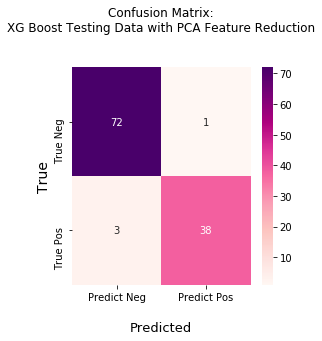

In [17]:
#Pretty Confusion Matrix for XGBoost Testing Data

import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,4))
sns.heatmap(xgb_cm, annot=True, cmap="RdPu", fmt="d", 
            xticklabels = ['Predict Neg', 'Predict Pos'], 
            yticklabels = ['True Neg', 'True Pos'])
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\nXG Boost Testing Data with PCA Feature Reduction\n\n")
plt.show()

# ROC Curve

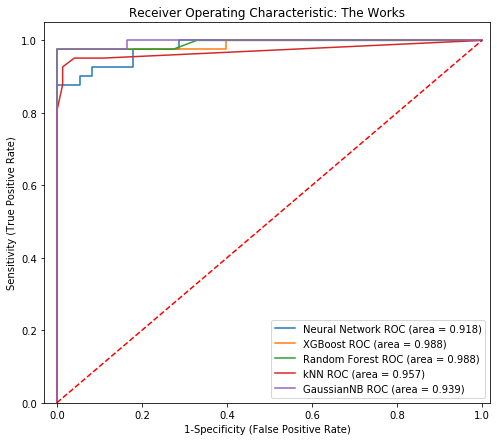

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost
from xgboost import XGBClassifier

sc = StandardScaler()
X_train_pca = sc.fit_transform(X_train)
X_test_pca = sc.transform(X_test)

pca = PCA(n_components=2)
# X_pca = pca.transform(X_scaled)
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

X_train_pca, X_test_pca, y_train_pca, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

plt.figure()

# Add the models to the list that you want to view on the ROC plot
# they're all basic bitches rn 'cept for XG BOOST baybeee

models = [
{
    'label': 'Neural Network',
    'model': MLPClassifier()
},
{
    'label': 'XGBoost',
    'model': XGBClassifier(subsample = 0.5, reg_lambda = 1.0,
                              n_estimators = 100, min_child_weight = 1.0,
                               gamma = 0.25, colsample_bytree = 1.0,
                               colsample_bylevel = 0.6, booster = 'gbtree')
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier()
}, 
{
    'label': 'kNN',
    'model': KNeighborsClassifier(),
},    
{
    'label': 'GaussianNB',
    'model': GaussianNB(),
}

]

# Below for loop iterates through my models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_pca, y_train_pca) # train the model
    y_pred_pca = model.predict(X_test_pca) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_pca)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test, model.predict(X_test_pca))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.03, 1.02])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic: The Works')
plt.legend(loc="lower right")
fig = plt.gcf()
fig.savefig('ROC_combos.png', dpi=100)
fig.set_size_inches(8, 7, forward=True)
plt.show()

# Analysis of 2005 Taiwan Credit Card Dataset:
## Default Payments

Who is likely to default? What features are most important for predicting who will default?

From : https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

In [133]:
#importing dataset and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpl

In [146]:
import io

cc = pd.read_csv(r"C:\Users\eklas\OneDrive\Desktop\CSV\Credit_Default.csv", skiprows = 1)
pd.options.display.max_rows = 10 #10 max rows so going forward it's not so messy to look at

cc.head() #showing first 5 rows here

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,...,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,...,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,...,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,...,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,...,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# What do these columns mean?

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default payment next month: Default payment (1=yes, 0=no)

In [147]:
# ID adds nothing, drop it like it's hot
cc.drop(['ID'], inplace = True, axis = 1)

In [148]:
# all-caps screaming at me. Too much screaming in the world right now. Let's not be animals.
# Map the capitalizing function to all column names
cc.columns = map(str.capitalize, cc.columns)

In [137]:
#show the columns now
cc.columns.tolist()

['Limit_bal',
 'Sex',
 'Education',
 'Marriage',
 'Age',
 'Pay_0',
 'Pay_2',
 'Pay_3',
 'Pay_4',
 'Pay_5',
 'Pay_6',
 'Bill_amt1',
 'Bill_amt2',
 'Bill_amt3',
 'Bill_amt4',
 'Bill_amt5',
 'Bill_amt6',
 'Pay_amt1',
 'Pay_amt2',
 'Pay_amt3',
 'Pay_amt4',
 'Pay_amt5',
 'Pay_amt6',
 'Default payment next month']

In [149]:
# Sex is antiquated, change that (to Gender) and Limit Bal (to Limit), 'Default payment next month' to 'Default'
cc=cc.rename(columns={'Sex':'Gender', 'Limit_bal':'Limit', 'Default payment next month':'Default'})

In [35]:
# how about the shape now shape of dataset
cc.shape

(30000, 24)

In [152]:
# pretty print statement for nulls.

nulls = cc.isnull().sum()
nulls = nulls.sum()
# no nulls, 31 cols, great
print('\nThere are', cc.shape[0],'rows in the dataset')
print('There are', cc.shape[1],'columns (features) in the dataset')
print('There are {}'.format(nulls),'nulls in the dataset')

if nulls < 1:
    print("Booya")
else:
    print("Imma isolate you null like you're coughing")


There are 30000 rows in the dataset
There are 24 columns (features) in the dataset
There are 0 nulls in the dataset
Booya


In [143]:
# Percentage of default and no default participants

count_no_default = len(cc[cc['Default']==0])
count_default = len(cc[cc['Default']==1])
pct_no_default = count_no_default/(count_no_default+count_default)*100
pct_of_default = count_default/(count_no_default+count_default)*100
print("Composition of the Dataset's Classes: \n")
print("Default: {:.1f}".format(pct_of_default), '%')
print("No Default: {:.1f}".format(pct_no_default), '%')

Composition of the Dataset's Classes: 

Default: 22.1 %
No Default: 77.9 %


In [153]:
#let's get the unique gender
cc['Gender'].unique()

array([2, 1], dtype=int64)

In [154]:
cc['Education'].unique()
# Education: 4, 5, 6, 0 denote 'Other/Unknown'

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [155]:
import statistics

cc['Education'] = cc['Education'].mask(cc['Education'] == 5, statistics.mode(cc['Education']))
cc['Education'] = cc['Education'].mask(cc['Education'] == 6, statistics.mode(cc['Education']))
cc['Education'] = cc['Education'].mask(cc['Education'] == 0, statistics.mode(cc['Education']))

In [156]:
cc['Education'].unique()

array([2, 1, 3, 4], dtype=int64)

In [157]:
cc['Education'].value_counts() #2, being most frequent, went from 14030 to 14375

2    14375
1    10585
3     4917
4      123
Name: Education, dtype: int64

In [158]:
# alternatively, the proportion of these educational groups relative to the dataset is small, so we could just exclude them
#  from any analysis
cc['Education'].value_counts(normalize = True)

2    0.479167
1    0.352833
3    0.163900
4    0.004100
Name: Education, dtype: float64

In [159]:
# OR! Another way is to set the offending observations to missing. The besmirched 'nan'
# I'll drop these vals once we get into ML portion

cc.loc[cc.Education == 0, 'Education'] = np.nan
cc.loc[cc.Education == 4, 'Education'] = np.nan
cc.loc[cc.Education == 5, 'Education'] = np.nan
cc.loc[cc.Education == 6, 'Education'] = np.nan

In [160]:
cc['Education'].value_counts(normalize = True) # now we have 100% in known education categories, with a low representation
#  of high-school educated

2.0    0.481139
1.0    0.354286
3.0    0.164575
Name: Education, dtype: float64

In [161]:
# so, almost 20% of grad-school attended people vs. about 25% of others default
# grad school has a protective factor against defaulting

cc['Default'].groupby(cc['Education']).value_counts(normalize = True)

Education  Default
1.0        0          0.807652
           1          0.192348
2.0        0          0.766539
           1          0.233461
3.0        0          0.748424
           1          0.251576
Name: Default, dtype: float64

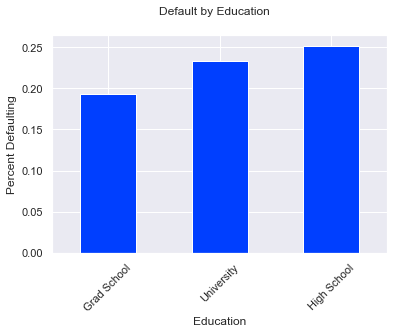

In [85]:
# how's this looking

import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-bright')

prob = cc['Default'].groupby(cc['Education']).value_counts(normalize = True)

threshold = 0.3
mask = prob < threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
#prob['other'] = tail_prob


prob.plot(kind='bar')
plt.suptitle('Default by Education')
plt.xlabel('Education')
plt.ylabel('Percent Defaulting')
plt.xticks([0,1,2],['Grad School','University','High School'],rotation=45)
plt.show()



In [122]:
# The highest percent defaults occured where education was High School, however there were many fewer records from High School 
#  educated individuals

cc['Default'].groupby(cc['Education']).value_counts()

# this dataset is unbalanced in many different ways, not just the most obvious where far more are in the negative (no default)
# class than the positive (default) class

Education  Default
1.0        0           8549
           1           2036
2.0        0          11019
           1           3356
3.0        0           3680
           1           1237
Name: Default, dtype: int64

In [123]:
# lot of unique marriage situations going on, no judgement, you do you

cc['Marriage'].unique()

array([ 1.,  2., nan])

In [89]:
# but, marriage should have a range of 1-3, so the 0s are missing/

cc['Marriage'].value_counts()

2    15964
1    13659
3      323
0       54
Name: Marriage, dtype: int64

In [90]:
# because the number is so low, we can just remove these. However, we should note that a disproportionate number of these are
#  in the education category 'High School'
# We might also note that the 'others' category of marriage is relatively small, so making conclusions based on their data
# will likely skew our results
cc['Marriage'].groupby(cc['Education']).value_counts()

Education  Marriage
1.0        2           6809
           1           3722
           3             50
           0              4
2.0        2           7178
                       ... 
           0              6
3.0        1           2861
           2           1909
           3            103
           0             44
Name: Marriage, Length: 12, dtype: int64

In [91]:
# therefore, let's identify both groups from the marriage column as missing values for the current analysis

cc.loc[cc.Marriage == 0, 'Marriage'] = np.nan
cc.loc[cc.Marriage == 3, 'Marriage'] = np.nan
cc['Marriage'].value_counts()

2.0    15964
1.0    13659
Name: Marriage, dtype: int64

In [92]:
# ok, now lets see if there is any patterns to this data. And, surprisingly there may be more proportional
#  default in married individuals.

cc['Default'].groupby(cc['Marriage']).value_counts(normalize = True)

Marriage  Default
1.0       0          0.765283
          1          0.234717
2.0       0          0.790717
          1          0.209283
Name: Default, dtype: float64

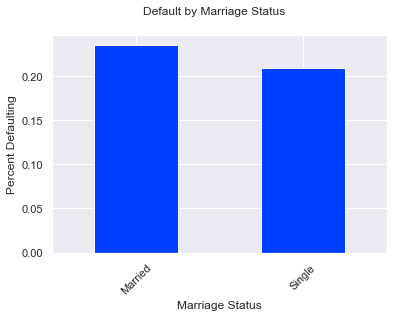

In [93]:
# graphically, we see a small difference
mar_prob = cc['Default'].groupby(cc['Marriage']).value_counts(normalize = True)

threshold = 0.3
mask = mar_prob < threshold
#tail_prob = prob.loc[~mask].sum()
mar_prob = mar_prob.loc[mask]
#prob['other'] = tail_prob


mar_prob.plot(kind='bar')
plt.suptitle('Default by Marriage Status')
plt.xlabel('Marriage Status')
plt.ylabel('Percent Defaulting')
plt.xticks([0,1],['Married','Single'],rotation=45)
plt.show()

In [124]:
# 0 and 3 represent Other, so could alternatively should replace 0's with 3's 
# so that all the Others are in one giant beautiful Other soup

cc['Marriage']=np.where(cc['Marriage']==0, 3, cc['Marriage'])

In [125]:
cc['Default'].unique() # that's whats up

array([1, 0], dtype=int64)

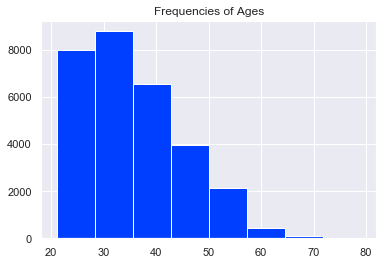

In [94]:
# lets's look at ages meow

# an actual plot of the histogram shows there is indeed a right skew to our data
#  considering we only had 12 people in the over 71.75 ages (above), we may need to keep this in mind for later analysis
#  We could normalize, drop, or use robust measures to deal with this. We'll see.
plt.hist(cc['Age'], bins=8)
plt.title("Frequencies of Ages")
plt.show()

Let's separate out people who used no credit and/or paid on time vs people who delayed a month or more, then count those.

- Payment status measurement: -2 = no CC use; -1 = paid in full, 0 = Use of revolving credit, 
- 1 = payment delay for one month, 2 = payment delay for two months; . . .; 8 = payment delay for eight months, 9 = payment delay for nine months and above.

In [95]:
# Now, to separate pmt status into unused or paid fully (0), and use of credit/pmt delays (1), 
# then count the number of pay delays.

def paydelay(value):
    if value > 0:
        return 1
    else:
        return 0

In [214]:
# Implementing my paydelay function on the cols Pay_0 to Pay_6, 
# then creating a new column to show how many late pmts a client has made on aggregate

late_pmt = cc.loc[:, 'Pay_0':'Pay_6'].applymap(paydelay).sum(axis = 1) # map my function to cols
cc.insert(23, 'Late_Pmt', late_pmt) # Insert just before the Default col

In [218]:
# Let's see that shiny new col up agains binary Default

cc[['Late_Pmt', 'Default']]

,Late_Pmt,Default
0,2,1
1,2,1
2,0,0
3,0,0
4,0,0
...,...,...
29995,0,0
29996,0,0
29997,3,1
29998,1,1


In [98]:
# Descriptive Analysis
pd.options.display.max_columns = 24 # letting loose, seeing all cols baybeeee
cc.describe()

,Limit,Gender,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_amt1,...,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Late_Pmt,Default
count,30000.000000,30000.000000,29877.000000,29623.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.810289,1.538906,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.834200,0.221200
std,129747.661567,0.489129,0.694900,0.498492,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,1.554303,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,1.000000,0.000000
max,1000000.000000,2.000000,3.000000,2.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,6.000000,1.000000


## Descriptive Stats
 - average age is 35.5 and educated with just shy of a college degree.
 - youngest credit card holder is 21 y/o; oldest is 79 y/o, both of whom should be staying inside so as not to spread corona

- Avg credit limit is NT\\$167,484
  - highest credit limit is \\$100,000,000
  - lowest credit limit is $10,000
- average Bill 1 is \\$51,223
- average Bill 6 is \\$38,871

In [100]:
#What's the relationship between gender and credit limit?
late_pmt_limit = cc.groupby('Late_Pmt')['Limit'].mean()

print("Number of Late Paymets and Limit Mean, NT$")
late_pmt_limit

Number of Late Paymets and Limit Mean, NT$


Late_Pmt
0    187259.429030
1    158388.160868
2    122588.730911
3    105173.310225
4     87392.218717
5     93422.818792
6     94049.217002
Name: Limit, dtype: float64

Pay_0 is the most recent, meaning that means that during the last month (September) the due amount was paid and only the revolving credit was used. Pay_2 is a value for a period 2 months before Pay_0 (July). So, if Pay_0=0 and Pay_2==3, this means the bill was paid.

Text(13.268182291666676, 0.5, 'Count')

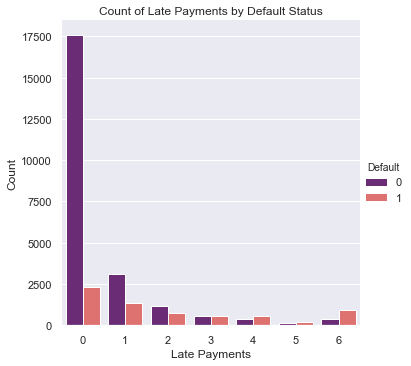

In [101]:
# 0 late pmts far outweigh multiple. 

sns.catplot(x='Late_Pmt', kind = 'count', hue = 'Default', palette='magma', data=cc)

plt.title("Count of Late Payments by Default Status")
plt.xlabel('Late Payments')
plt.ylabel('Count')

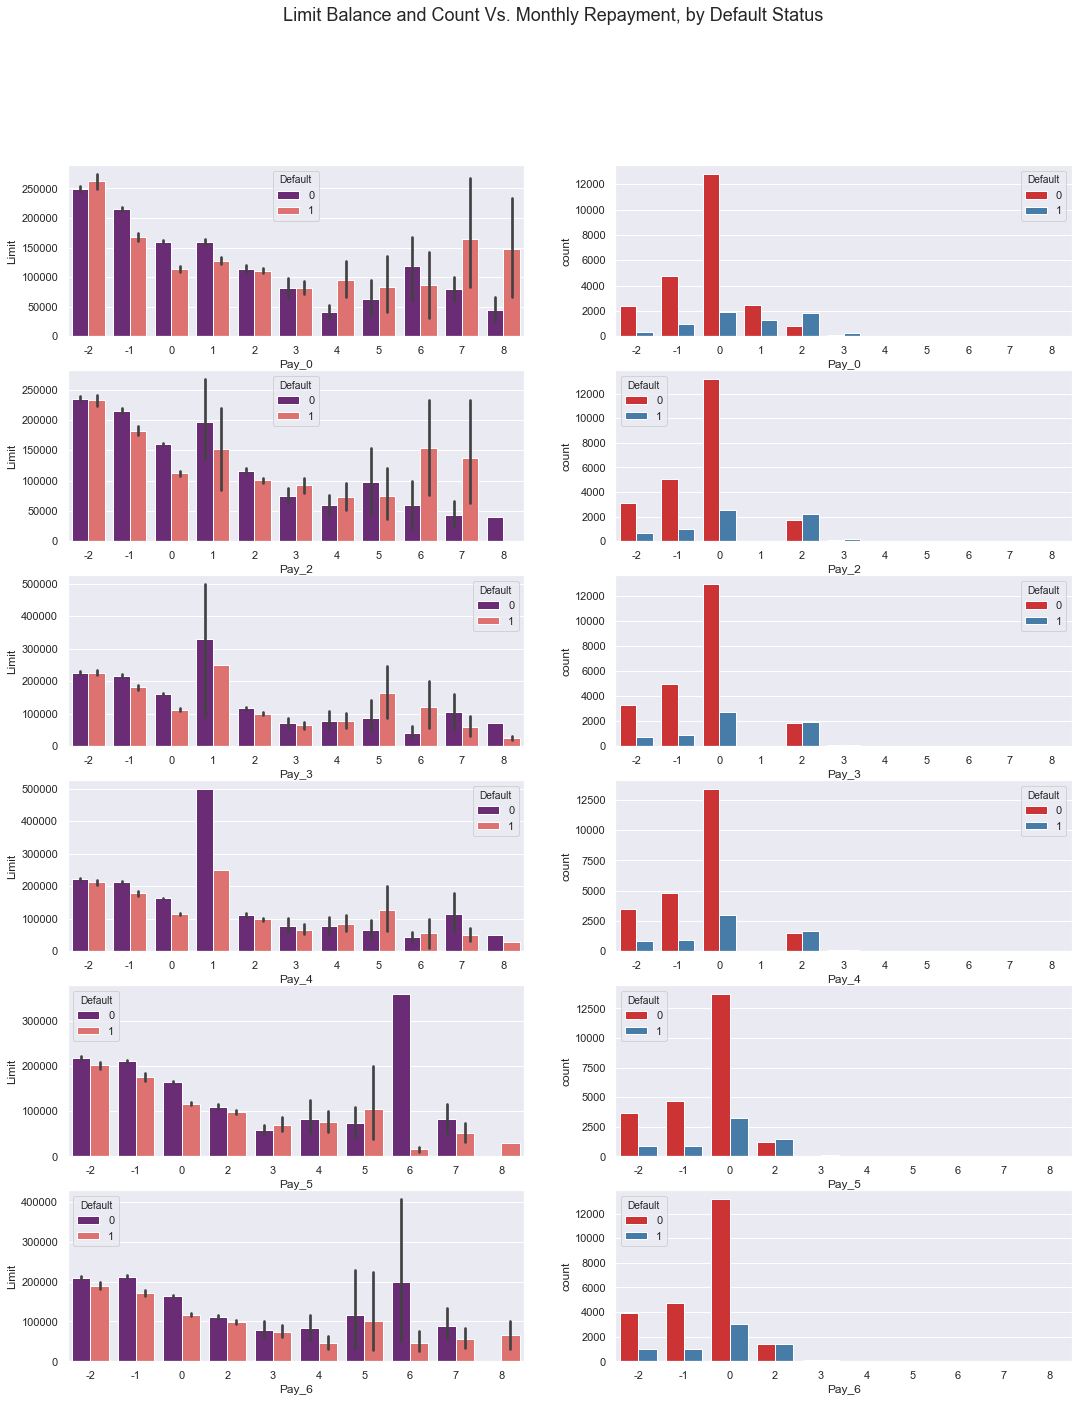

In [103]:
# Taking a look at the number of Defaults by the payment status each month. 

fig, axes= plt.subplots(6, 2, figsize = (18,22), facecolor='white') #figsize=(22,13),
fig.suptitle('Limit Balance and Count Vs. Monthly Repayment, by Default Status', size = 18)

#to give some examples of different palettes, here's this.
# deciding between magma and Set1 colour palette

ax1 = sns.barplot(x = 'Pay_0', y = 'Limit', hue='Default', palette='magma', data= cc, ax=axes[0,0])
ax2 = sns.countplot(x='Pay_0', hue='Default', palette='Set1', data= cc, ax=axes[0,1])

ax3 = sns.barplot(x='Pay_2', y = 'Limit', hue='Default', palette='magma', data= cc, ax=axes[1,0])
ax4 = sns.countplot(x='Pay_2', hue='Default', palette='Set1', data= cc, ax=axes[1,1])

ax5 = sns.barplot(x='Pay_3', y = 'Limit', hue='Default', palette='magma', data= cc, ax=axes[2,0])
ax6 = sns.countplot(x='Pay_3', hue='Default', palette='Set1', data= cc, ax=axes[2,1])

ax7 = sns.barplot(x='Pay_4', y = 'Limit', hue='Default', palette='magma', data= cc, ax=axes[3,0])
ax8 = sns.countplot(x='Pay_4', hue='Default', palette='Set1', data= cc, ax=axes[3,1])

ax9 = sns.barplot(x='Pay_5', y = 'Limit', hue='Default', palette='magma', data= cc, ax=axes[4,0])
ax10 = sns.countplot(x='Pay_5', hue='Default', palette='Set1', data= cc, ax=axes[4,1])

ax11 = sns.barplot(x='Pay_6', y = 'Limit', hue='Default', palette='magma', data= cc, ax=axes[5,0])
ax12 = sns.countplot(x='Pay_6', hue='Default', palette='Set1', data= cc, ax=axes[5,1])

# plt.tight_layout()

plt.show()

# Need: titles, maybe better sizing

In [106]:
#Predictive model - check for correlation 

val = cc.corr() #finds linear pearson correlation
val = val [val < 1] #to avoid correlating values with themselves (ie corr = 1)
val

,Limit,Gender,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_amt1,...,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Late_Pmt,Default
Limit,NaN,0.024755,-0.253818,-0.098943,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.236763,-0.153520
Gender,0.024755,NaN,0.011489,-0.031099,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.043760,-0.039961
Education,-0.253818,0.011489,NaN,-0.176173,0.193171,0.130555,0.151928,0.144526,0.136978,0.122763,0.108929,0.004781,...,-0.003113,-0.014030,-0.017484,-0.014696,-0.045719,-0.039568,-0.056099,-0.044408,-0.051284,-0.052996,0.079595,0.053162
Marriage,-0.098943,-0.031099,-0.176173,NaN,-0.464833,0.015040,0.021747,0.029389,0.029053,0.033569,0.030761,-0.023695,...,-0.024083,-0.020830,-0.022614,-0.018996,-0.008396,-0.012581,-0.006056,-0.015049,-0.001779,-0.004726,-0.008749,-0.030555
Age,0.144713,-0.090874,0.193171,-0.464833,NaN,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,-0.015356,0.013890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pay_amt4,0.203242,-0.002229,-0.044408,-0.015049,0.021379,-0.064005,-0.046858,-0.046067,-0.043461,-0.058299,0.019018,0.158303,...,0.143405,0.130191,0.293118,0.250237,0.199558,0.180107,0.216325,NaN,0.151830,0.157834,-0.072270,-0.056827
Pay_amt5,0.217202,-0.001667,-0.051284,-0.001779,0.022850,-0.058190,-0.037093,-0.035863,-0.033590,-0.033337,-0.046434,0.167026,...,0.179712,0.160433,0.141574,0.307729,0.148459,0.180908,0.159214,0.151830,NaN,0.154896,-0.075979,-0.055124
Pay_amt6,0.219595,-0.002766,-0.052996,-0.004726,0.019478,-0.058673,-0.036500,-0.035861,-0.026565,-0.023027,-0.025299,0.179341,...,0.182326,0.177637,0.164184,0.115494,0.185735,0.157634,0.162740,0.157834,0.154896,NaN,-0.065917,-0.053183
Late_Pmt,-0.236763,-0.043760,0.079595,-0.008749,-0.015356,0.635398,0.661151,0.653741,0.634303,0.606932,0.564630,-0.026905,...,0.001566,0.020798,0.037398,0.042391,-0.086045,-0.068192,-0.076115,-0.072270,-0.075979,-0.065917,NaN,0.398394


Text(0.5, 1, 'Credit Default Correlation Heatmap\n')

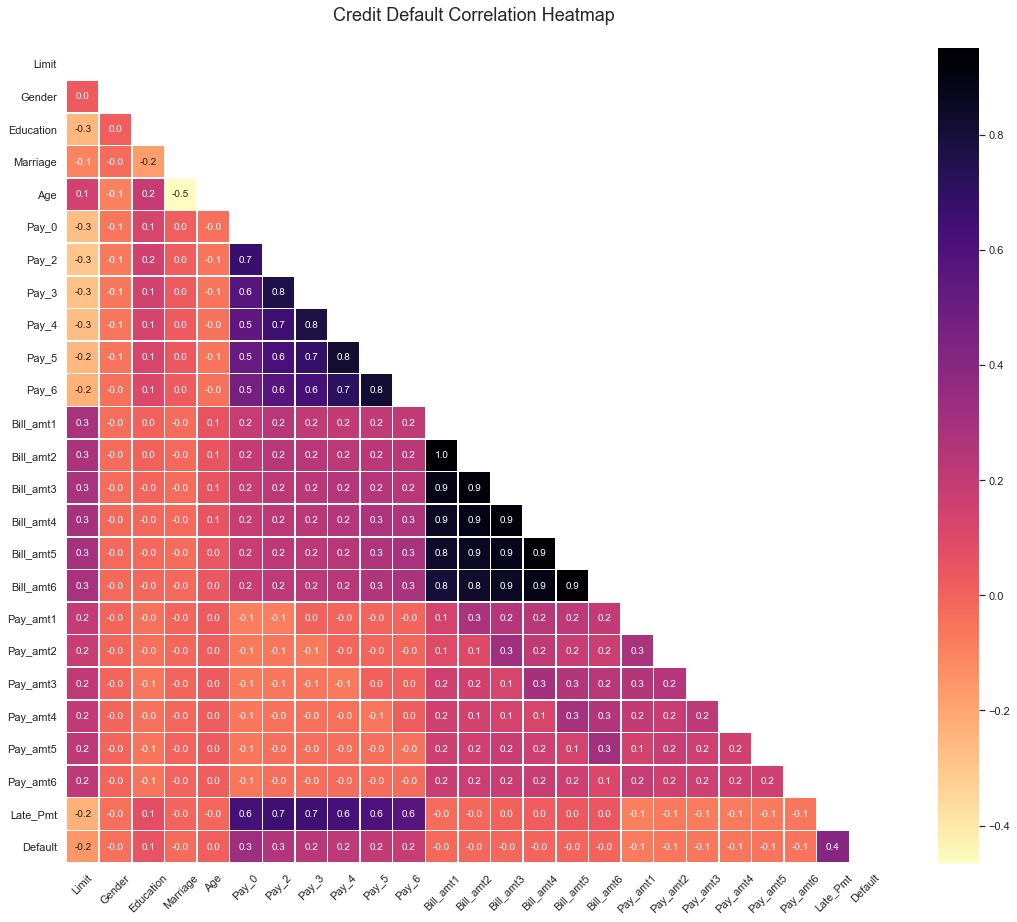

In [111]:
# Visualize

mask = np.full_like(val,0) #alternatively, can use np.zeros_like(result)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f,ax=plt.subplots(figsize=(20,15))
sns.heatmap(val, cbar=True, square=True, annot=True, fmt= '.1f',
           xticklabels=True, yticklabels=True,
           cmap='magma_r', linewidths=.5, mask=mask, ax=ax)
ax.set_xticklabels(    ax.get_xticklabels(),
                   rotation = 45)
plt.title("Credit Default Correlation Heatmap\n", size = 18)

# Machine Learning

In [162]:
# first up: drop all those nasty nan's we made earlier
cc.dropna(inplace=True)

In [163]:
#isolate Independent Var, X (pay_0:pay_6) and Dependent Var, Y (Default) using pandas manipulation.
import sklearn
from sklearn.model_selection import train_test_split

X = cc.drop('Default', axis=1)
y = cc['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=33, stratify = y)
# split this ish. Using stratify = y to use the right proportion of default/no default in my train and test,
# IE, my y var has 22% in the positive category (1, default) and 78% in the 0 category (no default). One way to somewhat 
# offset the extreme imbalance of this dataset.

# Feature Importance using XG Boost

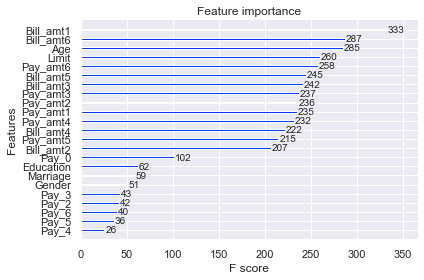

In [164]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
sns.despine()
fig_size = (15,15)
plt.tight_layout()
plt.show()
# interesting, Bill_Amt 1, then Pay_amt6 are most important. Late_Pmt is in the lower half.
# showing the default parameters for XG B

# PCA : Principal Components Analysis
PCA identifies the hyperplane that lies closest to the data, and then projects the data onto it.

,Limit,Gender,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_amt1,...,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Late_Pmt,Default
0,20000,2,2.0,1.0,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,689,0,0,0,0,2,1
1,120000,2,2.0,2.0,26,-1,2,0,0,0,2,2682,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000,2,1
2,90000,2,2.0,2.0,34,0,0,0,0,0,0,29239,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,50000,2,2.0,1.0,37,0,0,0,0,0,0,46990,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,50000,1,2.0,1.0,57,-1,0,-1,0,0,0,8617,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3.0,1.0,39,0,0,0,0,0,0,188948,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,0
29996,150000,1,3.0,2.0,43,-1,-1,-1,-1,0,0,1683,...,3502,8979,5190,0,1837,3526,8998,129,0,0,0,0
29997,30000,1,2.0,2.0,37,4,3,2,-1,0,0,3565,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100,3,1
29998,80000,1,3.0,1.0,41,1,-1,0,0,0,-1,-1645,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,1


In [171]:
from sklearn.decomposition import PCA

pca	= PCA(n_components = 8) 
X2D	= pca.fit_transform(X)

pca.explained_variance_ratio_
sum_of_pca_variance = (pca.explained_variance_ratio_.sum()) *100
print("The  reduced features account for the following % variability in Credit Card dataset:\n "
      , pca.explained_variance_ratio_)

print("\nTotal variability retained with PCA reduced to 8 features: {:.2f}%".format(sum_of_pca_variance))

The  reduced features account for the following % variability in Credit Card dataset:
  [0.61092726 0.2949845  0.03044072 0.01694933 0.00941282 0.00902778
 0.00752355 0.00638495]

Total variability retained with PCA reduced to 8 features: 98.57%


In [172]:
import numpy as np
from sklearn.decomposition import PCA

pca	= PCA() 
pca.fit(X) 
cumsum = np.cumsum(pca.explained_variance_ratio_) 
d = np.argmax(cumsum >= 0.98) + 1
print("Number of features required to retain 98% of the dataset's variability: ", d)
# compute PCA without reducing dimensionality, then computes minumum number of dimensions required
# to preserve 95% of the training set's variance
# 1 feature accounts for greater than or equal to 95% of the training dataset's variabiltiy

Number of features required to retain 98% of the dataset's variability:  8


Text(0.5, 1.0, '\nExplained Variance by # of Dimensions using PCA\n')

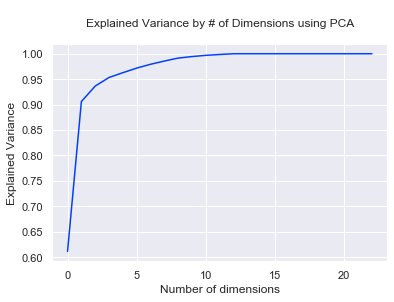

In [173]:
# Explained variance

# scale it

from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

plt.plot(cumsum)
plt.xlabel("Number of dimensions")
plt.ylabel("Explained Variance")
plt.title("\nExplained Variance by # of Dimensions using PCA\n")
# pretty much all of the variability is explained by the time 10 dimensions rolls around

In [175]:
from sklearn.decomposition import PCA # keep the first two principal components of the data 

pca = PCA(n_components=8) # fit PCA model to credit card
pca.fit(X_scaled)# transform data onto the first two principal components 

X_pca = pca.transform(X_scaled) 
print("Original shape of Credit Card dataset: {}".format(str(X_scaled.shape))) 
print("Reduced shape of Credit Card dataset: {}".format(str(X_pca.shape)))

# reduced training dataset down to 2 features

Original shape of Credit Card dataset: (29877, 23)
Reduced shape of Credit Card dataset: (29877, 8)


Text(0, 0.5, 'Second principal component')

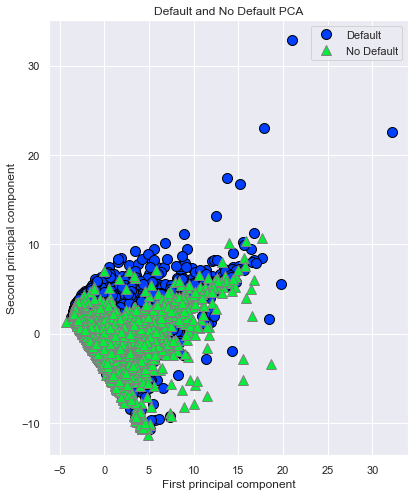

In [177]:
import numpy as np

import mglearn

# plot the first 2 principal components

# plot first vs. second principal component, colored by class 
plt.figure(figsize=(10, 8)) 
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y) 
plt.legend(["Default", "No Default"],
           loc="best") 
plt.gca().set_aspect("equal") 
plt.title("Default and No Default PCA")
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")

# Set up Pipeline for XG Boost

Pipeline: a handy pre-processing method that helps automate the machine learning workflow. I've chosen to scale, run PCA, cross-validate and search the best parameters in one step, in addition to testing and evaluating the cross-validated model. 

Best parameters (CV score = 81.42%)
Best parameters:
{'pca__n_components': 15, 'm__subsample': 0.9, 'm__silent': 0, 'm__reg_lambda': 5.0, 'm__min_child_weight': 3.0, 'm__max_depth': 15, 'm__gamma': 0.5, 'm__eta': 0.01, 'm__colsample_bytree': 0.9, 'm__colsample_bylevel': 0.4, 'm__booster': 'gbtree'}




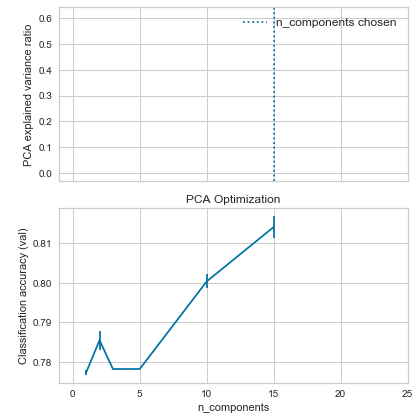

In [270]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model1 = XGBClassifier()

pipe_xg = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model1)]) # set up the pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify = y)
# setting the stratify parameter makes a split so that the proportion of values in the sample
# produced will be the same as the proportion of values provided, ie correct proportion of Default to No Default

# set parameters of pipelines using ‘__’ separated parameter names:

param_grid = {"pca__n_components":[1,2,3,4,5, 10, 15, 20, 25],
              'm__silent': [0],
              'm__max_depth': [6, 10, 15, 20],
              'm__eta': [0.001, 0.01, 0.1, 0.2, 0,3], #learning rate
              'm__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'm__colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'm__colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'm__min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
              'm__gamma': [0, 0.25, 0.5, 1.0],
              'm__reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], #L2 default is 1, akin to Ridge regression
              'm__booster':['gbtree']
              }

search = RandomizedSearchCV(pipe_xg, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_xg = search.fit(X_train, y_train)
#Get Best Parameters
best_param_score = search.best_score_ *100
print("Best parameters (CV score = {:.2f}%)".format(best_param_score))
print("Best parameters:")
print(search.best_params_)
print('\n')

# Plot the PCA spectrum
pca.fit(X_train)

#plot

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
plt.title("PCA Optimization")
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('\nClassification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 25)

plt.tight_layout()
plt.show()

# 20 features seems my best bet

In [271]:
# cross-validation and error measuring
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'eta': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, as_pandas=True, seed=123)

In [272]:
cv_results.head()

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.198715,0.001010,0.202597,0.000899
1,0.192221,0.001648,0.195736,0.002012
2,0.190514,0.001810,0.193727,0.002252
3,0.187820,0.003547,0.191017,0.001586
4,0.187753,0.001702,0.191184,0.002079


In [273]:
# cross-validation mean
print("Cross-Validation Results for error mean on test data:")
print((cv_results["test-error-mean"]).tail(1))

Cross-Validation Results for error mean on test data:
7    0.189544
Name: test-error-mean, dtype: float64


In [274]:
# AUC results with Cross-Validation

cv_results_auc = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, metrics = 'auc', as_pandas=True, seed=123)

cv_results_auc.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.701752,0.001958,0.693769,0.006093
1,0.755493,0.003290,0.748162,0.008719
2,0.765242,0.003067,0.758576,0.007816
3,0.767955,0.002072,0.762220,0.005277
4,0.770989,0.001361,0.764831,0.005442


In [275]:
#----------Testing Best Parameters---------

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time

t0 = time()
clf_xg =clf_xg.best_estimator_
y_pred_xg = clf_xg.predict(X_test)
print("[----------] Done in %0.3fs" % (time() - t0))

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores_cv_xg = cross_val_score(clf_xg, X_train, y_train, cv=cv)

scores = cross_val_score(clf_xg, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

[----------] Done in 0.123s


------------------------- | XGBoost Performance Summary | ---------------------------
Accuracy: 81.59%
CV Mean: 0.815 (std: 0.01)


XG Boost Confusion Matrix:

[[4417  233]
 [ 867  459]]

XG Boost Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4650
           1       0.66      0.35      0.45      1326

    accuracy                           0.82      5976
   macro avg       0.75      0.65      0.67      5976
weighted avg       0.80      0.82      0.79      5976

Mean ROC AUC: 75.30%
Misclassified examples: 1100
Count of prediction dataset:  5976
Misclassification Rate: 18.41%
Training Set Accuracy: 85.800%
Test Set Accuracy: 81.59%

------------------ XGBoostClassifier -- Parameters specified -- : classifier.fit [Done]



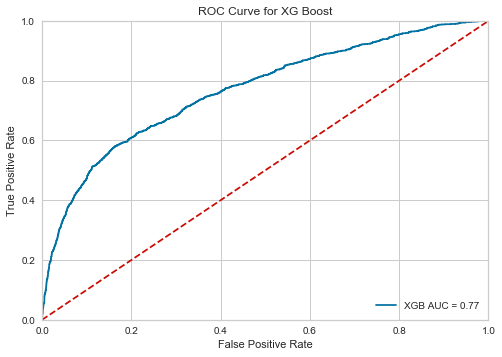

In [276]:
#---------XGBoost Classification report--------

print ("------------------------- | XGBoost Performance Summary | ---------------------------")
xgb_accuracy = (accuracy_score(y_pred_xg, y_test)) *100
print("Accuracy: {:.2f}%".format(xgb_accuracy))
print("CV Mean: {:.3f} (std: {:.2f})".format(scores_cv_xg.mean(),
                                          scores_cv_xg.std()),
                                          end="\n\n" )
xgb_cm = confusion_matrix(y_test, y_pred_xg)
xg_misclass = (y_test != y_pred_xg).sum()
xg_error_rate = ((y_test != y_pred_xg).sum()/len(y_pred_xg))*100
mean_roc_auc = (scores.mean())*100
xg_train_accuracy = (clf_xg.score(X_train, y_train))*100
xg_test_accuracy = (clf_xg.score(X_test, y_test))*100

print("\nXG Boost Confusion Matrix:\n")
print(xgb_cm)
print("\nXG Boost Classification Report:\n")
print(classification_report(y_test, y_pred_xg))
print('Mean ROC AUC: {:.2f}%'.format(mean_roc_auc))
print('Misclassified examples: {:d}'.format(xg_misclass))
print('Count of prediction dataset: ', len(y_pred_xg))
print('Misclassification Rate: {:.2f}%'.format(xg_error_rate))
print("Training Set Accuracy: {:.3f}%".format(xg_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(xg_test_accuracy))
print('\n------------------ XGBoostClassifier -- Parameters specified -- : classifier.fit [Done]\n')

# ROC the houseeeeeeeeeeeeeeeeee
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_xg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve for XG Boost')
plt.plot(fpr, tpr, 'b', label = 'XGB AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

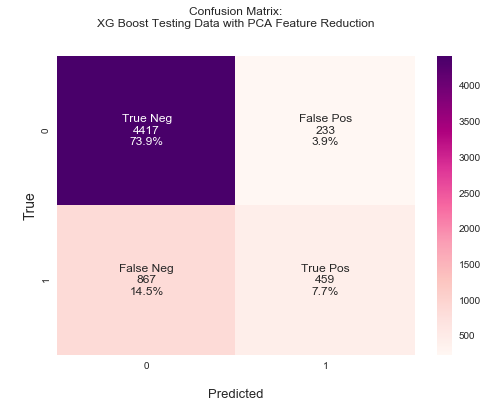

In [277]:
#Confuse dat matrix for XG Boost. I want to see it both as percentages and as absolute numbers.

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               xgb_cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    xgb_cm.flatten()/np.sum(xgb_cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(xgb_cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\nXG Boost Testing Data with PCA Feature Reduction\n\n")
plt.show()

Recall: ability of a model to find all the relevant cases within a dataset. 
- The number of true positives divided by the number of true positives plus the number of false negatives. 
 - True positives are data point classified as positive by the model that actually are positive (are correct)
 - False negatives are data points the model identifies as negative that actually are positive (incorrect).

Precision: the ability of a classification model to identify only the relevant data points.
 - the number of true positives divided by the number of true positives plus the number of false positives. 
 - False positives are cases the model incorrectly labels as positive that are actually negative. In this example, individuals the model classifies as defaulting that are not defaulting.
 - when we increase the recall, we decrease the precision
 
While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.

F1: a weighted average of precision and recall.

--------------- | XBBoost Classifier | -- Learning Curve -- : [Done]


C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


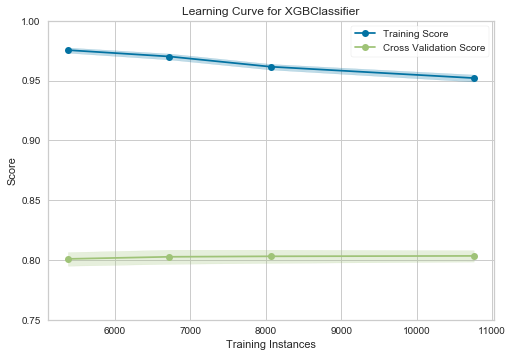

In [205]:
## Learning Curve : XG Boost ##
print('--------------- | XBBoost Classifier | -- Learning Curve -- : [Done]')
import sklearn.metrics
from yellowbrick.model_selection import LearningCurve
sizes = [0.2, 0.25, 0.3, 0.4]
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_xg, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4 # I want f1_weighted becasue f1
    # is the weighted avg of precision and recall. 
)

visualizer.fit(X, y)        # Fit the data to the visualizer
plt.ylim(0.75, 1.0)
visualizer.show()           # Show this mother

# big gap between training and CV score, this model may be underfitting.

--------------- | Logistic Regression | -- Learning Curve -- : [Done]


C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


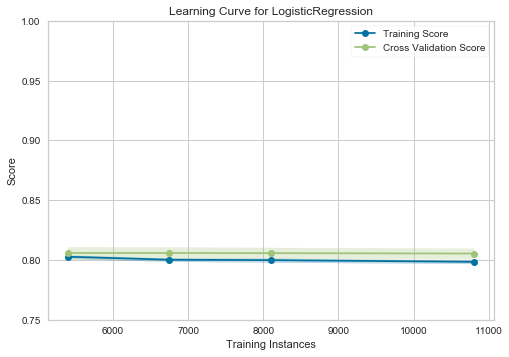

In [42]:
## Learning Curve : Logistic Regression ##
print('--------------- | Logistic Regression | -- Learning Curve -- : [Done]')
import sklearn.metrics
from yellowbrick.model_selection import LearningCurve
sizes = [0.2, 0.25, 0.3, 0.4]
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_log, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4 # I want f1_weighted becasue f1
    # is the weighted avg of precision and recall. 
)

visualizer.fit(X, y)        # Fit the data to the visualizer
plt.ylim(0.75, 1.0)
visualizer.show()           # Show this mother
# This has a good-sized gap, model is learning smoothly and doesn't show signs of overfitting

# ROC Curve

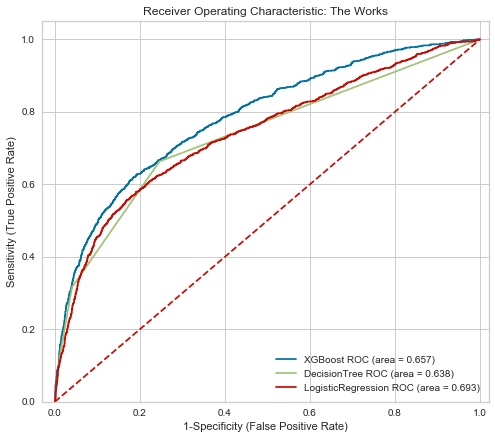

In [282]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import DecisionTree
from sklearn.neural_network import MLPClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

sc = StandardScaler()
X_train_pca = sc.fit_transform(X_train)
X_test_pca = sc.transform(X_test)

pca = PCA(n_components=15)
# X_pca = pca.transform(X_scaled)
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

X_train_pca, X_test_pca, y_train_pca, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

plt.figure()

# Add the models to the list that I want to view on the ROC plot

models = [
{
    'label': 'XGBoost',
    'model': XGBClassifier(subsample = 0.9, silent  = 0, reg_lambda =5.0,
                           n_estimators = 100, min_child_weight =3.0,
                           max_depth= 15, gamma = 0.5, eta = 0.01,
                           colsample_bytree  = 0.9, colsample_bylevel =0.4, 
                           booster = 'gbtree')
},
{
    'label': 'DecisionTree',
    'model': DecisionTreeClassifier(ccp_alpha = 0, criterion = 'entropy',
                                    max_depth = 2)
}, 
{
    'label': 'LogisticRegression',
    'model': LogisticRegression(solver = 'liblinear',
                                penalty = 'l2', C = 1, max_iter = 1000, class_weight = 'balanced')        
}]

# Below for loop iterates through my models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_pca, y_train_pca) # train the model
    y_pred_pca = model.predict(X_test_pca) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_pca)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test, model.predict(X_test_pca))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.03, 1.02])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic: The Works')
plt.legend(loc="lower right")
fig = plt.gcf()
# fig.savefig('ROC_combos.png', dpi=100)
fig.set_size_inches(8, 7, forward=True)
plt.show()

# ROC Curve

Receiver Operating Characteristic curve (or ROC curve) plots:
 - the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.  
 - shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
 - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
 - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
 - The area under the curve measures the test accuracy.

# Wheat Dataset
With 3 varieties of wheat, this is a multiclass classification problem.

In [8]:
#Wheat
import matplotlib.pyplot as plt
import io
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

wheat = pd.read_csv(r"C:\Users\eklas\OneDrive\Desktop\CSV\Wheat.csv")

pd.set_option('display.max_rows', 8)

# reanme some cols, I don't like that some have spaces
wheat=wheat.rename(columns={'Kernel Length':'Kernel_Length', 
                                'Asymmetry coefficient':'Asymmetry_coeff', 
                            'Kernel Width':'Kernel_width',
                            'Kernel groove length':'Kernel_groove_len'})
# Assign X and y
X = wheat.drop('Variety', axis = 1)
y = wheat['Variety']

# scale it
scaler = StandardScaler() 
scaler.fit(X) 
X_scaled = scaler.transform(X)

wheat.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_width,Asymmetry_coeff,Kernel_groove_len,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [2]:
wheat.describe()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_width,Asymmetry_coeff,Kernel_groove_len,Variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [9]:
# find nulls

nulls = wheat.isnull().sum()
nulls = nulls.sum()

# no nulls, 31 cols, great
print('\nThere are', wheat.shape[0],'rows in the dataset')
print('There are', wheat.shape[1],'columns (features) in the dataset')
print('There are {}'.format(nulls),'nulls in the dataset')


There are 210 rows in the dataset
There are 8 columns (features) in the dataset
There are 0 nulls in the dataset


In [4]:
print('Values count of the binary column: ')
wheat["Variety"].value_counts()

Values count of the binary column: 


2    70
1    70
0    70
Name: Variety, dtype: int64

In [5]:
# Percentage of wheat varieties
dataset = wheat
count_variety_1 = len(dataset[dataset['Variety']==0])
count_variety_2 = len(dataset[dataset['Variety']==1])
count_variety_3 = len(dataset[dataset['Variety']==2])
count_total = count_variety_1 + count_variety_2 + count_variety_3

pct_var_1 = count_variety_1/(count_total)*100
pct_var_2 = count_variety_2/(count_total)*100
pct_var_3 = count_variety_3/(count_total)*100

print("Composition of the Dataset's Classes: \n")
print("Wheat Variety 1: {:.1f}".format(pct_var_1), '%')
print("Wheat Variety 2: {:.1f}".format(pct_var_2), '%')
print("Wheat Variety 3: {:.1f}".format(pct_var_3), '%')
# balanced AF

Composition of the Dataset's Classes: 

Wheat Variety 1: 33.3 %
Wheat Variety 2: 33.3 %
Wheat Variety 3: 33.3 %


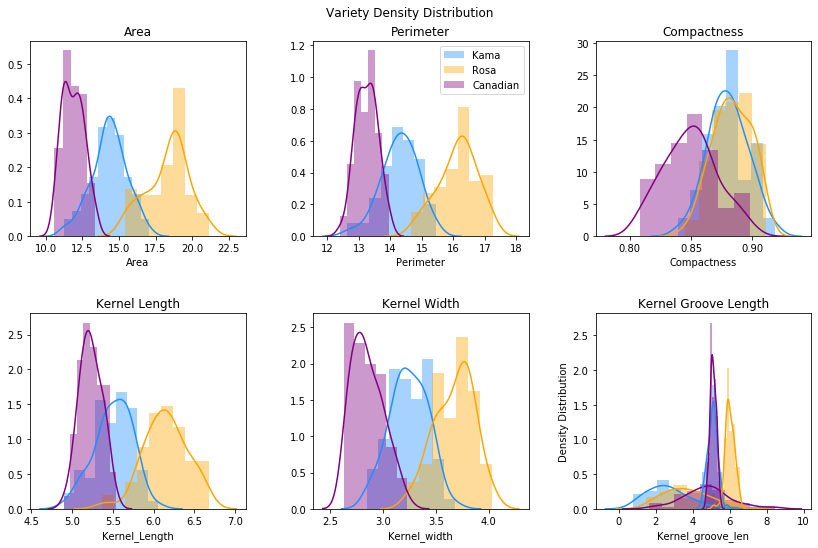

In [10]:
# Plot all the Distribution Densities
import seaborn as sns

f, axes= plt.subplots(2, 3, figsize = (12,8), facecolor='white') 
f.suptitle('Variety Density Distribution')

ax1 = sns.distplot( wheat.loc[wheat.Variety == 0, "Area"] , 
                   color="dodgerblue", label="Variety 1", ax = axes[0,0])
ax1 = sns.distplot( wheat.loc[wheat.Variety == 1 , "Area"] , 
                   color="orange", label="Variety 2", ax = axes[0,0])
ax1 = sns.distplot( wheat.loc[wheat.Variety == 2 , "Area"] , 
                   color="purple", label="Variety 3", ax = axes[0,0])

ax1.title.set_text('Area')
plt.ylabel("Density Distribution")


ax2 = sns.distplot( wheat.loc[wheat.Variety == 0, "Perimeter"] , 
                   color="dodgerblue", label="Variety 1", ax = axes[0,1])
ax2 = sns.distplot( wheat.loc[wheat.Variety == 1 , "Perimeter"] , 
                   color="orange", label="Variety 2", ax = axes[0,1])
ax2 = sns.distplot( wheat.loc[wheat.Variety == 2 , "Perimeter"] , 
                   color="purple", label="Variety 3", ax = axes[0,1])

ax2.title.set_text('Perimeter')
plt.ylabel("Density Distribution")

ax3 = sns.distplot( wheat.loc[wheat.Variety == 0, "Compactness"] , 
                   color="dodgerblue", label="Variety 1", ax = axes[0,2])
ax3 = sns.distplot( wheat.loc[wheat.Variety == 1 , "Compactness"] , 
                   color="orange", label="Variety 2", ax = axes[0,2])
ax3 = sns.distplot( wheat.loc[wheat.Variety == 2 , "Compactness"] , 
                   color="purple", label="Variety 3", ax = axes[0,2])

ax3.title.set_text('Compactness')
plt.ylabel("Density Distribution")

ax4 = sns.distplot( wheat.loc[wheat.Variety == 0, "Kernel_Length"] , 
                   color="dodgerblue", label="Variety 1", ax = axes[1,0])
ax4 = sns.distplot( wheat.loc[wheat.Variety == 1 , "Kernel_Length"] , 
                   color="orange", label="Variety 2", ax = axes[1,0])
ax4 = sns.distplot( wheat.loc[wheat.Variety == 2 , "Kernel_Length"] , 
                   color="purple", label="Variety 3", ax = axes[1,0])

ax4.title.set_text('Kernel Length')
plt.ylabel("Density Distribution")

ax5 = sns.distplot( wheat.loc[wheat.Variety == 0, "Kernel_width"] , 
                   color="dodgerblue", label="Variety 1", ax = axes[1,1])
ax5 = sns.distplot( wheat.loc[wheat.Variety == 1 , "Kernel_width"] , 
                   color="orange", label="Variety 2", ax = axes[1,1])
ax5 = sns.distplot( wheat.loc[wheat.Variety == 2 , "Kernel_width"] , 
                   color="purple", label="Variety 3", ax = axes[1,1])

ax5.title.set_text('Kernel Width')
plt.ylabel("Density Distribution")

ax6 = sns.distplot( wheat.loc[wheat.Variety == 0, "Asymmetry_coeff"] , 
                   color="dodgerblue", label="Variety 1", ax = axes[1,2])
ax6 = sns.distplot( wheat.loc[wheat.Variety == 1 , "Asymmetry_coeff"] , 
                   color="orange", label="Variety 2", ax = axes[1,2])
ax6 = sns.distplot( wheat.loc[wheat.Variety == 2 , "Asymmetry_coeff"] , 
                   color="purple", label="Variety 3", ax = axes[1,2])

ax6.title.set_text('Asymmetry_coeff')
plt.ylabel("Density Distribution")


ax7 = sns.distplot( wheat.loc[wheat.Variety == 0, "Kernel_groove_len"] , 
                   color="dodgerblue", label="Variety 1", ax = axes[1,2])
ax7 = sns.distplot( wheat.loc[wheat.Variety == 1 , "Kernel_groove_len"] , 
                   color="orange", label="Variety 2", ax = axes[1,2])
ax7 = sns.distplot( wheat.loc[wheat.Variety == 2 , "Kernel_groove_len"] , 
                   color="purple", label="Variety 3", ax = axes[1,2])

ax7.title.set_text('Kernel Groove Length')
plt.ylabel("Density Distribution")

ax2.legend(['Kama', 'Rosa','Canadian'],
           loc="best") 
plt.tight_layout(pad = 3.0)
plt.show()

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [11]:
# Seperate the y from the x columns
from sklearn.preprocessing import label_binarize

X = wheat.drop('Variety', axis=1)
y = wheat['Variety']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print('--------------- Split-out dataset [Done]')

--------------- Split-out dataset [Done]


In [12]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({0: 70, 1: 70, 2: 70})


In [13]:
from sklearn.decomposition import PCA # keep the first two principal components of the data 

pca = PCA(n_components=3) # fit PCA model to wheat data 
pca.fit(X_scaled)# transform data onto the first two principal components 

X_pca = pca.transform(X_scaled) 
print("Original shape of Wheat dataset: {}".format(str(X_scaled.shape))) 
print("Reduced shape of Wheat dataset: {}".format(str(X_pca.shape)))

# reduced training dataset down to 2 features

Original shape of Wheat dataset: (210, 7)
Reduced shape of Wheat dataset: (210, 3)


In [14]:
from sklearn.decomposition import PCA

pca	= PCA(n_components = 3) 
X2D	= pca.fit_transform(X)

pca.explained_variance_ratio_
sum_explained_var = (pca.explained_variance_ratio_.sum())*100

print("The reduced features account for the following % variability in Wheat dataset:\n "
      , pca.explained_variance_ratio_)
print("Total variability accounted for: {:.2f}%".format(sum_explained_var))


The reduced features account for the following % variability in Wheat dataset:
  [0.8293852  0.16363245 0.00565791]
Total variability accounted for: 99.87%


In [15]:
import numpy as np

pca	= PCA() 
pca.fit(X) 
cumsum = np.cumsum(pca.explained_variance_ratio_) 
d = np.argmax(cumsum >= 0.95) + 1
d
# compute PCA without reducing dimensionality, then computes minumum number of dimensions required
# to preserve 95% of the training set's variance
# 2 features account for greater than or equal to 95% of the training dataset's variabiltiy

2

Text(0.5, 1.0, '\nExplained Variance by # of Dimensions using PCA\n')

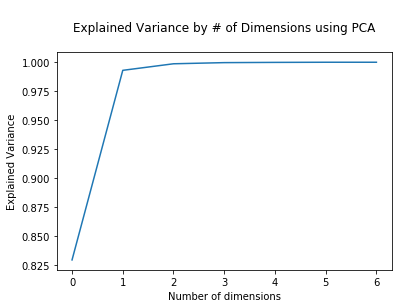

In [16]:
# Explained variance

# scale it

from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

plt.plot(cumsum)
plt.xlabel("Number of dimensions")
plt.ylabel("Explained Variance")
plt.title("\nExplained Variance by # of Dimensions using PCA\n")
# pretty much all of the variability is explained after 2 dimensions

Text(0, 0.5, 'Second principal component')

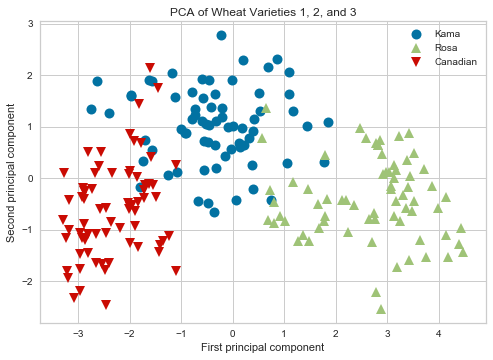

In [154]:
import numpy as np

import mglearn

# plot the 2 principal components

# plot first vs. second principal component, colored by class 
plt.figure(figsize=(8, 8)) 
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y) 
plt.legend(['Kama', 'Rosa','Canadian'],
           loc="best") 
plt.gca().set_aspect("equal") 
plt.title("PCA of Wheat Varieties 1, 2, and 3")
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")

# Feature Importance with XG Boost

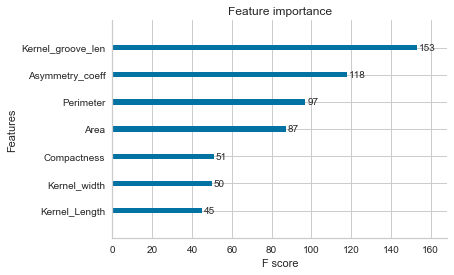

In [164]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
sns.despine()
fig_size = (15,15)
plt.show()
# Kernel groove length, Asymmetry coefficient, and Perimeter are the top 3 features for XGBoost.
#Kernel length is the least important

In [165]:
# cross-validation and error measuring
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"multi:softprob",'colsample_bytree': 0.3,'learning_rate': 0.2,
                'max_depth': 6, 'alpha': 10, 'num_class':3}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, as_pandas=True, seed=123)

In [166]:
cv_results

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.111905,0.016836,0.204762,6.834616e-02
1,0.061905,0.008909,0.100000,1.387779e-17


In [167]:
# cross-validation mean
print("Cross-Validation Results for error mean on test data:")
print((cv_results["test-merror-mean"]).tail(1))

Cross-Validation Results for error mean on test data:
1    0.1
Name: test-merror-mean, dtype: float64


In [168]:
# cross-validation and error measuring
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"multi:softmax",'colsample_bytree': 0.3,'learning_rate': 0.2,
                'max_depth': 6, 'alpha': 10, 'num_class': 3}


cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, as_pandas=True, seed=123)

In [169]:
cv_results.head()

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.111905,0.016836,0.204762,6.834616e-02
1,0.061905,0.008909,0.100000,1.387779e-17


In [170]:
# cross-validation mean
print("Cross-Validation Results for error mean on test data:")
print((cv_results["test-merror-mean"]).tail(1))

Cross-Validation Results for error mean on test data:
1    0.1
Name: test-merror-mean, dtype: float64


# XBG Pipeline 

Best parameters (CV score = 94.96%)
{'pca__n_components': 6, 'm__subsample': 0.9, 'm__silent': 0, 'm__reg_lambda': 5.0, 'm__objective': 'multiclass:softmax', 'm__num_class': 3, 'm__min_child_weight': 10.0, 'm__max_depth': 15, 'm__gamma': 1.0, 'm__eta': 0.01, 'm__colsample_bytree': 0.4, 'm__colsample_bylevel': 0.7}


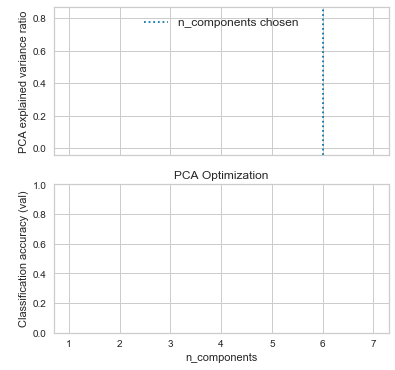

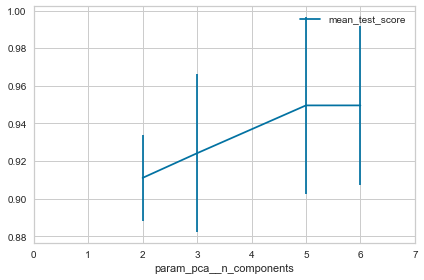

In [171]:
import matplotlib
from matplotlib import *
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings

warnings.filterwarnings('ignore')
#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model1 = XGBClassifier(random_state=123)
pipe_xg = Pipeline([('s', scaler), ('pca', pca),('m', model1)])

#pipe_dt.fit(X_train, y_train)


# set parameters of pipelines using ‘__’ separated parameter names:

param_grid = {"pca__n_components":[1,2,3,4,5,6,7],
              'm__objective':['multiclass:softmax'],
              'm__num_class':[3],
              'm__silent': [0],
              'm__max_depth': [6, 10, 15, 20],
              'm__eta': [0.001, 0.01, 0.1, 0.2, 0,3],
              'm__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'm__colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'm__colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'm__min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
              'm__gamma': [0, 0.25, 0.5, 1.0],
              'm__reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], #L2 default is 1, akin to Ridge regression
#               'm__booster':['gbtree']
              }

search = RandomizedSearchCV(pipe_xg, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_xg = search.fit(X_train, y_train)
#Get Best Parameters
best_param_score = search.best_score_ * 100
print("Best parameters (CV score = {:.2f}%)".format(best_param_score))
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

#plot

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
plt.title("PCA Optimization")
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend = True)
#                ax=ax1)
ax1.set_ylabel('\nClassification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(0, 7)

plt.tight_layout()
plt.show()

In [172]:
import sklearn
sklearn.metrics.SCORERS.keys() #what scoring metrics do I have available to me for a multiclass classification problem?

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

done in 0.011s


Text(0, 0.5, 'Roc-Auc-Ovr')

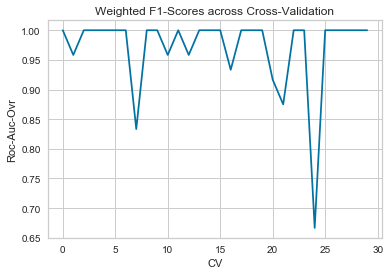

In [173]:
#----------Testing Best Parameters---------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time

t0 = time()
# clf_xg =clf_xg.best_estimator_
y_pred_xg = clf_xg.predict(X_test)
print("done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores_cv_xg = cross_val_score(clf_xg, X_train, y_train, cv=cv)

scores = cross_val_score(clf_xg, X_test, y_test, scoring='roc_auc_ovr_weighted', cv=cv, n_jobs=-1) #because this is multiclass,
# I've chosen roc-auc one-vs-rest. Could also have used f1 or weighted f1 score..
plt.plot(scores)
plt.title("Weighted F1-Scores across Cross-Validation")
plt.xlabel("CV")
plt.ylabel("Roc-Auc-Ovr")


In [162]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

# 'pca__n_components': 6, 'm__subsample': 1.0, 'm__silent': 0, 
#  'm__reg_lambda': 0.1, 'm__objective': 'softmax', 'm__num_class': 3, 
#  'm__n_estimators': 100, 'm__min_child_weight': 0.5, 'm__max_depth': 15, 
#  'm__gamma': 0, 'm__eta': 0.1, 'm__colsample_bytree': 0.4, 
#  'm__colsample_bylevel': 1.0, 'm__booster': 'gbtree'

params = {
    'max_depth': 6,
    'reg_lambda':0.1,
    'gamma':0,
    'eta':0.2, # learning rate
    'colsample_bytree':0.4,
    'colsample_bylevel':1,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 3,
    'n_gpus': 0
}
bst = xgb.train(params, dtrain)
y_pred = bst.predict(dtest)
cv_mean = scores_cv_xg.mean() * 100
cv_std = scores_cv_xg.std() * 100

print("CV Mean Accuracy: {:.2f}% (std: {:.2f}%)\n".format(cv_mean, cv_std))
xgb_cm = confusion_matrix(y_test, y_pred)
xg_misclassification = (y_test != y_pred).sum()
xg_error_rate = ((y_test != y_pred).sum()/len(y_pred)) * 100
xg_test_accuracy = (clf_xg.score(X_test, y_test)) * 100
xg_train_accuracy = (clf_xg.score(X_train, y_train)) * 100
scores = scores.mean() * 100

print("-------------------XG Boost Wheat Classification Report:-------------------\n")


print(classification_report(y_test, y_pred))

print("\nXG Boost Confusion Matrix:\n")
print(xgb_cm)
print('\nMisclassified examples: {:d}'.format(xg_misclassification))
print('Mean Weighted Roc-Auc (One Vs. Rest) score: {:.2f}%'.format(scores))
print('Misclassification/Error rate: {:.2f}%'.format(xg_error_rate))
print("Training set Accuracy: {:.2f}%".format(xg_train_accuracy))
print("Test set Accuracy: {:.2f}%".format(xg_test_accuracy))
print('\n--------------- XG Boost----------Parameters specified-- : classifier.fit [Done]')

CV Mean Accuracy: 91.16% (std: 7.53%)

-------------------XG Boost Wheat Classification Report:-------------------

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.88      0.78      0.82        18
           2       0.84      0.89      0.86        18

    accuracy                           0.79        53
   macro avg       0.79      0.79      0.79        53
weighted avg       0.80      0.79      0.79        53


XG Boost Confusion Matrix:

[[12  2  3]
 [ 4 14  0]
 [ 2  0 16]]

Misclassified examples: 11
Mean Weighted Roc-Auc (One Vs. Rest) score: 991865.08%
Misclassification/Error rate: 20.75%
Training set Accuracy: 95.54%
Test set Accuracy: 94.34%

--------------- XG Boost----------Parameters specified-- : classifier.fit [Done]


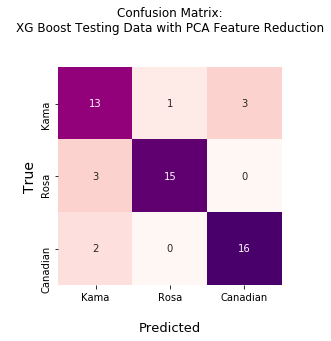

In [73]:
#Pretty Confusion Matrix for XGBoost Testing Data

import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,4))
sns.heatmap(xgb_cm, annot=True, cmap="RdPu", cbar=False, fmt="d", 
            xticklabels = ['Kama', 'Rosa', 'Canadian'], 
            yticklabels = ['Kama', 'Rosa','Canadian'])
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\nXG Boost Testing Data with PCA Feature Reduction\n\n")
plt.show()


Prediction accuracy for the standardized test dataset with PCA -- XG Boost
96.23%


PC 1 with:
 [ 0.44287252  0.43995164  0.28145327  0.42260123  0.43131664 -0.12941219
  0.38693305]

PC 2 with:
 [-0.03634207 -0.09071135  0.5213123  -0.20675818  0.11355505 -0.72191209
 -0.37667417]


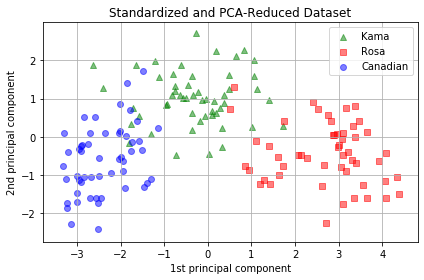

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt

fig_size = (9, 7)
# Fit to data and predict using pipelined scaling, GNB and PCA.
pipe_xg.fit(X_train, y_train)
pred_test_std = pipe_xg.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the standardized test dataset with PCA -- XG Boost')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extract PCA from pipeline
pca_std = pipe_xg.named_steps['pca']

# Show first principal components
print('\nPC 1 with:\n', pca_std.components_[0])
print('\nPC 2 with:\n', pca_std.components_[1])
# Use PCA without and with scale on X_train data for visualization.
scaler = pipe_xg.named_steps['s']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, ax = plt.subplots()

for l, c, m in zip(range(0, 3), ('green', 'red', 'blue'), ('^', 's', 'o')):
    ax.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax.set_title('Standardized and PCA-Reduced Dataset')

ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(['Kama', 'Rosa','Canadian'],
           loc="best") 
ax.grid()

plt.tight_layout()

plt.show()

---------------------| XG Boost -- Learning Curve |----------------- 



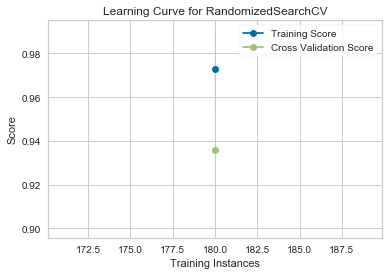

In [163]:
print('---------------------| XG Boost -- Learning Curve |----------------- \n')
from yellowbrick.model_selection import LearningCurve

sizes = [1, 100, 180]
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_xg, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Let's see this puppy

In [142]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError

classes = ['Kama', 'Rosa','Canadian']

balance = ClassBalance(XGBClassifier(), classes=classes)

# balance.fit(y)   
# balance.score(X,y)
# b = balance.poof()

In [150]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3)

clf = XGBClassifier(max_depth = 6, learning_rate = 0.2)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

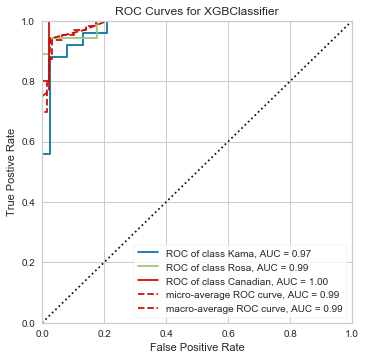

In [152]:
rocauc = ROCAUC(clf, size=(400, 400), classes=classes)

rocauc.score(X_test, y_test)  
r = rocauc.poof()

# plt.tight_layout()
# plt.show()
### Roc curve is so good that it's off the chart. 

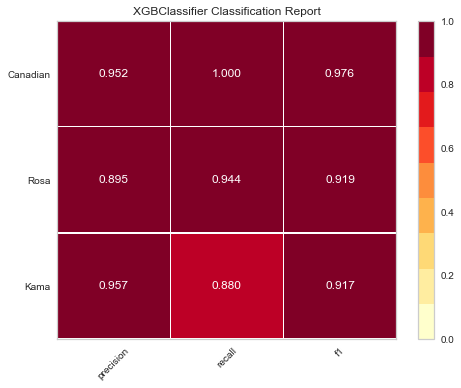

In [153]:
report = ClassificationReport(clf, size=(500, 400), classes=classes, )

report.score(X_test, y_test)
c = report.poof()

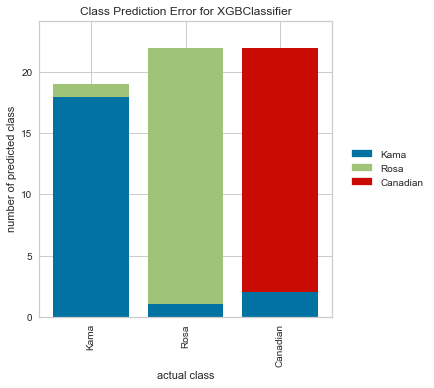

In [141]:
# class prediction error
error = ClassPredictionError(clf, size=(500, 400), classes=classes)

error.score(X_test, y_test)##
e = error.poof()